In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso

In [3]:
# Load dataset
labeled_data_path = "/hpc/compgen/users/cchang/Projects/gene_exp_VAE/data/SyNet_Normalized_Expression_Par_Labeled_Data_Only.csv"

gene_exp_df_labeled = pd.read_csv(labeled_data_path).iloc[: , 1:]
gene_exp_df_labeled_transposed = gene_exp_df_labeled.T




In [6]:
patient_info_df = pd.read_csv("/hpc/compgen/users/cchang/Projects/gene_exp_VAE/data/Patient_information.csv")
# print(patient_info_df.head())
surv_df = patient_info_df.loc[:, ['SurvivalTime', 'PatientID', 'StudyName']]
# print(surv_df.head())
surv_df['Surv_label'] = surv_df['SurvivalTime'].apply(lambda x: 0 if x < (365*5) else 1)
surv_df['ID_Study']=surv_df.apply(lambda row: str(row.PatientID)+';'+str(row.StudyName), axis=1)
surv_df.set_index('ID_Study', inplace=True)
surv_df.drop(columns=['SurvivalTime', 'PatientID', 'StudyName'], inplace=True)
surv_df

,Surv_label
ID_Study,
GSM107072;Pawitan,0
GSM107073;Pawitan,1
GSM107074;Pawitan,1
GSM107075;Pawitan,1
GSM107076;Pawitan,1
...,...
TCGA-E2-A108-01;TCGA,0
TCGA-BH-A0B2-01;TCGA,0
TCGA-AO-A12B-01;TCGA,1


In [9]:
gene_exp_surv_df = gene_exp_df_labeled_transposed.join(surv_df)
print(gene_exp_surv_df.head())
print(gene_exp_surv_df.shape)
gene_exp_surv_df.to_csv("/hpc/compgen/users/cchang/Projects/gene_exp_VAE/data/SyNet_Normalized_Expression_Par_Surv_Labeled.csv", index=True, header=True)

                         0        1        2        3        4        5  \
GSM107072;Pawitan -0.50715 -0.00914  0.60264  0.33471 -0.10111  0.07469   
GSM107073;Pawitan  0.60264  0.05463 -0.13815 -0.42850  0.28111 -0.18296   
GSM107074;Pawitan  0.57725 -0.45224  0.07469 -0.57794 -0.28099  0.30166   
GSM107075;Pawitan  0.13745 -0.31282  0.15237  0.08815 -0.44019  0.49256   
GSM107076;Pawitan -0.15077 -0.10731 -0.20953 -0.11336 -0.29659 -0.00914   

                         6        7        8        9  ...    11739    11740  \
GSM107072;Pawitan -0.03391 -0.16972 -0.08879  0.47474  ... -0.08262  0.24310   
GSM107073;Pawitan -0.42850 -0.23696  0.41141  0.15237  ... -0.47843 -0.45224   
GSM107074;Pawitan -0.62383  0.34628  0.38406 -0.00914  ... -0.96171  0.44184   
GSM107075;Pawitan  0.04800  0.91007 -0.53981 -0.59982  ... -0.02774 -0.21634   
GSM107076;Pawitan  0.15992  0.14487 -0.05832 -0.11336  ...  0.04136 -0.02160   

                     11741    11742    11743    11744    11745    11

In [84]:
X = gene_exp_surv_df.iloc[:, :-1].to_numpy()
print(X.shape)
y = gene_exp_surv_df.iloc[:, -1].to_numpy()
print(y.shape)

(4129, 11748)
(4129,)


In [86]:
lasso_model = Lasso(alpha=0.1)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
cv = KFold(n_splits=10, shuffle=True, random_state=1)
scores = cross_val_score(lasso_model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean MAE: 0.454 (0.006)


In [92]:
from sklearn.linear_model import LogisticRegression

logistic_reg_model = LogisticRegression(
    penalty='l1',
    solver='saga',  # or 'liblinear'
    )

In [93]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
cv = KFold(n_splits=10, shuffle=True, random_state=1)
scores = cross_val_score(logistic_reg_model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

/hpc/compgen/users/cchang/Software/miniconda3/envs/sklearn-env2/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/hpc/compgen/users/cchang/Software/miniconda3/envs/sklearn-env2/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/hpc/compgen/users/cchang/Software/miniconda3/envs/sklearn-env2/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/hpc/compgen/users/cchang/Software/miniconda3/envs/sklearn-env2/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/hpc/compgen/users/cchang/Software/miniconda3/envs/sklearn-env2/lib/python3.9/site-packages/

Mean MAE: 0.365 (0.031)


/hpc/compgen/users/cchang/Software/miniconda3/envs/sklearn-env2/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/hpc/compgen/users/cchang/Software/miniconda3/envs/sklearn-env2/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/hpc/compgen/users/cchang/Software/miniconda3/envs/sklearn-env2/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/hpc/compgen/users/cchang/Software/miniconda3/envs/sklearn-env2/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/hpc/compgen/users/cchang/Software/miniconda3/envs/sklearn-env2/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/hpc/compgen/users/cchang/Software/miniconda3/envs/sklearn-env2/lib/python3.9/site-packages/

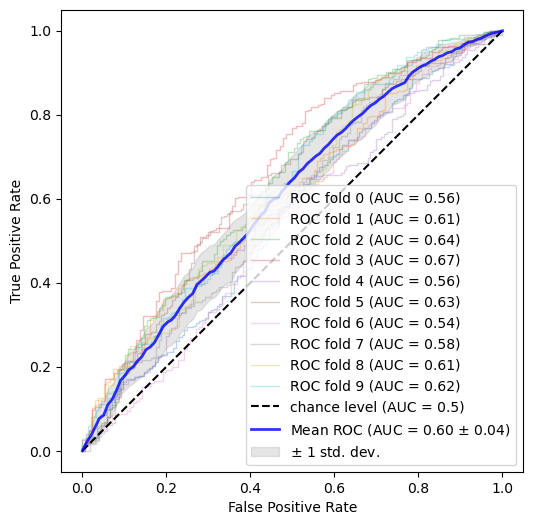

In [94]:
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import KFold

cv = KFold(n_splits=10, shuffle=True, random_state=1)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(6, 6))
for fold, (train, test) in enumerate(cv.split(X, y)):  # From here...
    logistic_reg_model.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        logistic_reg_model,
        X[test],  # ROC calculated using the test results. 
        y[test],
        name=f"ROC fold {fold}",
        alpha=0.3,
        lw=1,
        ax=ax,
    )                                                   # ...to here, it's doing the same as cross_val_score? Just doing it with train (fit) and test separately?
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
ax.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="False Positive Rate",
    ylabel="True Positive Rate"
)
ax.axis("square")
ax.legend(loc="lower right")
plt.show()